# Object Detetion

In [32]:
import pyrealsense2 as rs
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

import torchvision
import torchvision.models as models
from torchvision import transforms
from torch.utils import data

## Configure depth and color streams

In [2]:
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

In [14]:
# Start streaming
pipeline.start(config)


for int in range(10):
    # Wait for a coherent pair of frames: depth and color
    frames = pipeline.wait_for_frames()

    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    # Convert images to numpy arrays
    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

# Apply colormap on depth image (image must be converted to 8-bit per pixel first)
#depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

# Stack both images horizontally
#images = np.hstack((color_image, depth_image))


pipeline.stop()

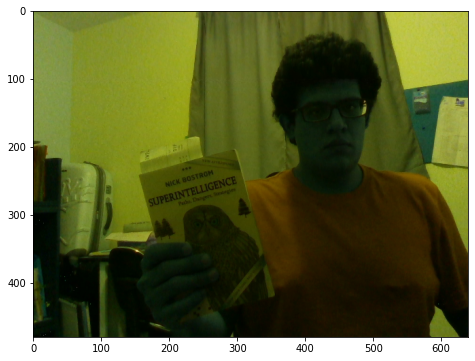

In [15]:
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(color_image)

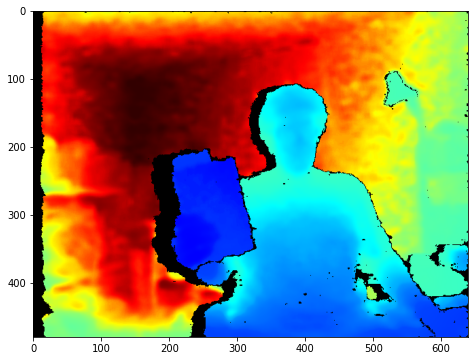

In [16]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)

## Test Inception Pretrainded

In [22]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [39]:
x = transform(color_image)

In [34]:
faster_r_cnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [43]:
faster_r_cnn.cuda()
faster_r_cnn.eval()

prediction = faster_r_cnn(x.view(1,3,480,640).cuda())

In [44]:
prediction

[{'boxes': tensor([[ 12.4868,   0.0000, 640.0000, 447.9499],
          [158.0071, 184.4569, 246.7767, 241.9718],
          [580.6639, 124.0182, 640.0000, 291.2064]], device='cuda:0',
         grad_fn=<StackBackward>),
  'labels': tensor([ 1, 15,  1], device='cuda:0'),
  'scores': tensor([0.1569, 0.0851, 0.0825], device='cuda:0', grad_fn=<IndexBackward>)}]